In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

from models.feature_extractor import ViTFeatureExtractor
from models.classifier import ViTLargeClassifier

device = torch.device('cuda:5' if torch.cuda.is_available() else 'cpu')

In [ ]:
# vit 特征提取
feature_extractor = ViTFeatureExtractor(
        model_name="vit_large_patch16_224"
    ).to(device)

# 训练好的分类器
classifier = ViTLargeClassifier(input_dim=1000).to(device)
classifier.load_state_dict(torch.load('./ckpt/best_classifier.pth'))

feature_extractor.eval()
classifier.eval()

# Autistic example

In [28]:
image_path = '/data7/cyd/files/code/Autism/Extract/FaceExpr/imgs/A_0001.jpg'
img = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

img_tensor = transform(img).unsqueeze(0).to(device)

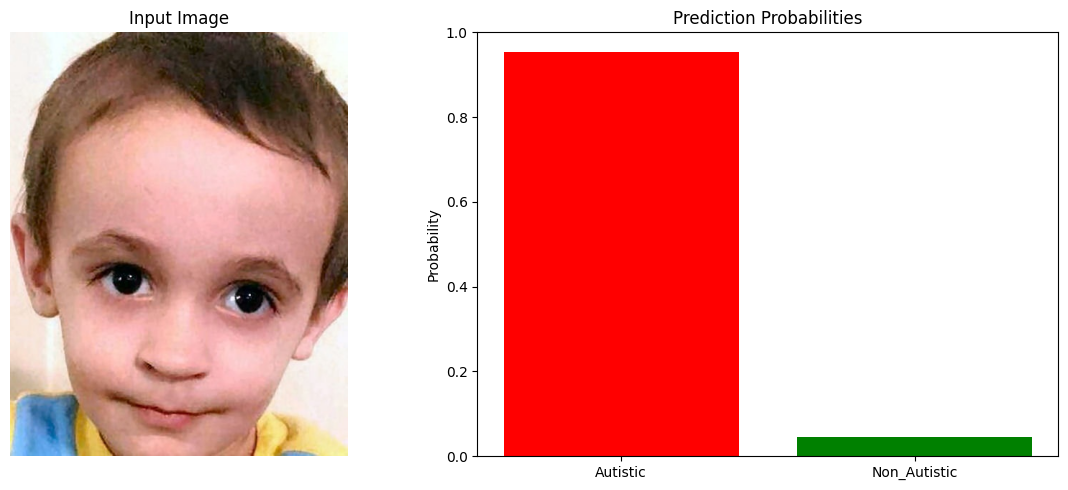

In [29]:
with torch.no_grad():
    features = feature_extractor(img_tensor)
    outputs = classifier(features)

    probs = torch.softmax(outputs, dim=1)
    _, pred = torch.max(outputs, 1)

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Input Image')

classes = ['Autistic', 'Non_Autistic']
ax2.bar(classes, probs.cpu().numpy().flatten(), color=['red', 'green'])
ax2.set_ylim(0, 1)
ax2.set_title('Prediction Probabilities')
ax2.set_ylabel('Probability')

plt.tight_layout()

In [30]:
print(pred)

tensor([0], device='cuda:5')


# Non-Autistic example

In [31]:
image_path = '/data7/cyd/files/code/Autism/Extract/FaceExpr/imgs/N_0001.jpg'
img = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

img_tensor = transform(img).unsqueeze(0).to(device)

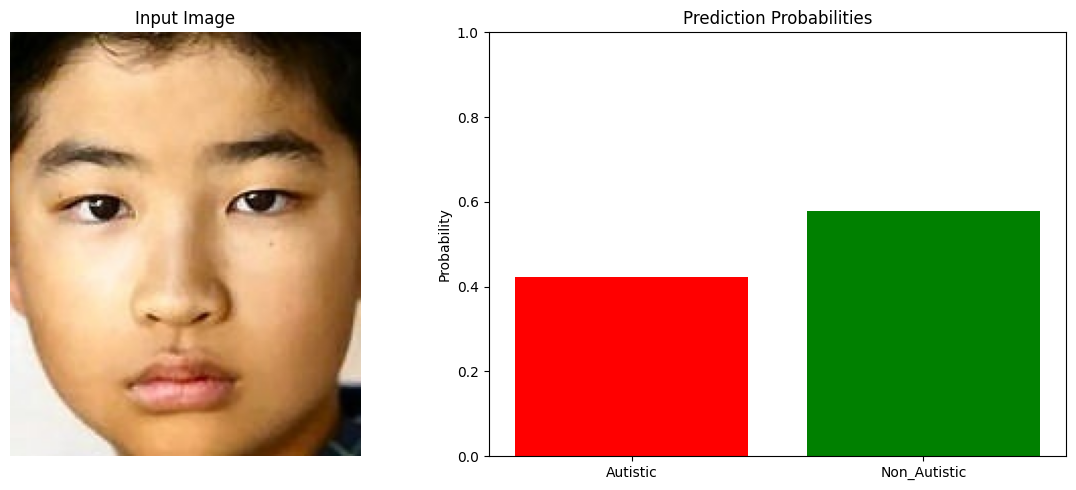

In [32]:
with torch.no_grad():
    features = feature_extractor(img_tensor)
    outputs = classifier(features)

    probs = torch.softmax(outputs, dim=1)
    _, pred = torch.max(outputs, 1)

# 可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(img)
ax1.axis('off')
ax1.set_title('Input Image')

classes = ['Autistic', 'Non_Autistic']
ax2.bar(classes, probs.cpu().numpy().flatten(), color=['red', 'green'])
ax2.set_ylim(0, 1)
ax2.set_title('Prediction Probabilities')
ax2.set_ylabel('Probability')

plt.tight_layout()

In [33]:
print(pred)

tensor([1], device='cuda:5')
